# Analysis notebook for Bayesian inference 
### August George, 2022, OHSU

#### RMSD

#### 1D marginal posterior distributions

# pocoMC sampler (preconditioned Monte Carlo)

### 12D model

using 10 dataframes


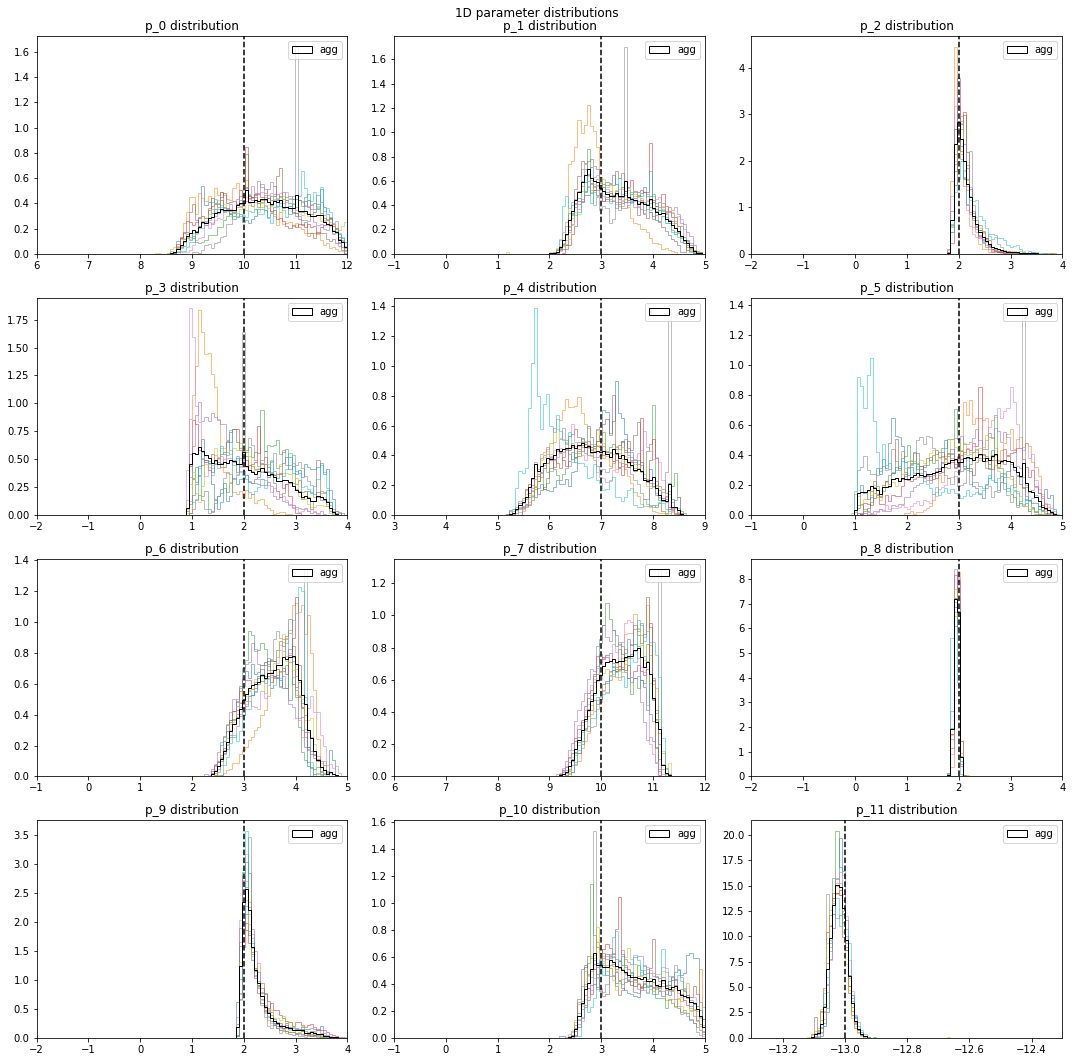

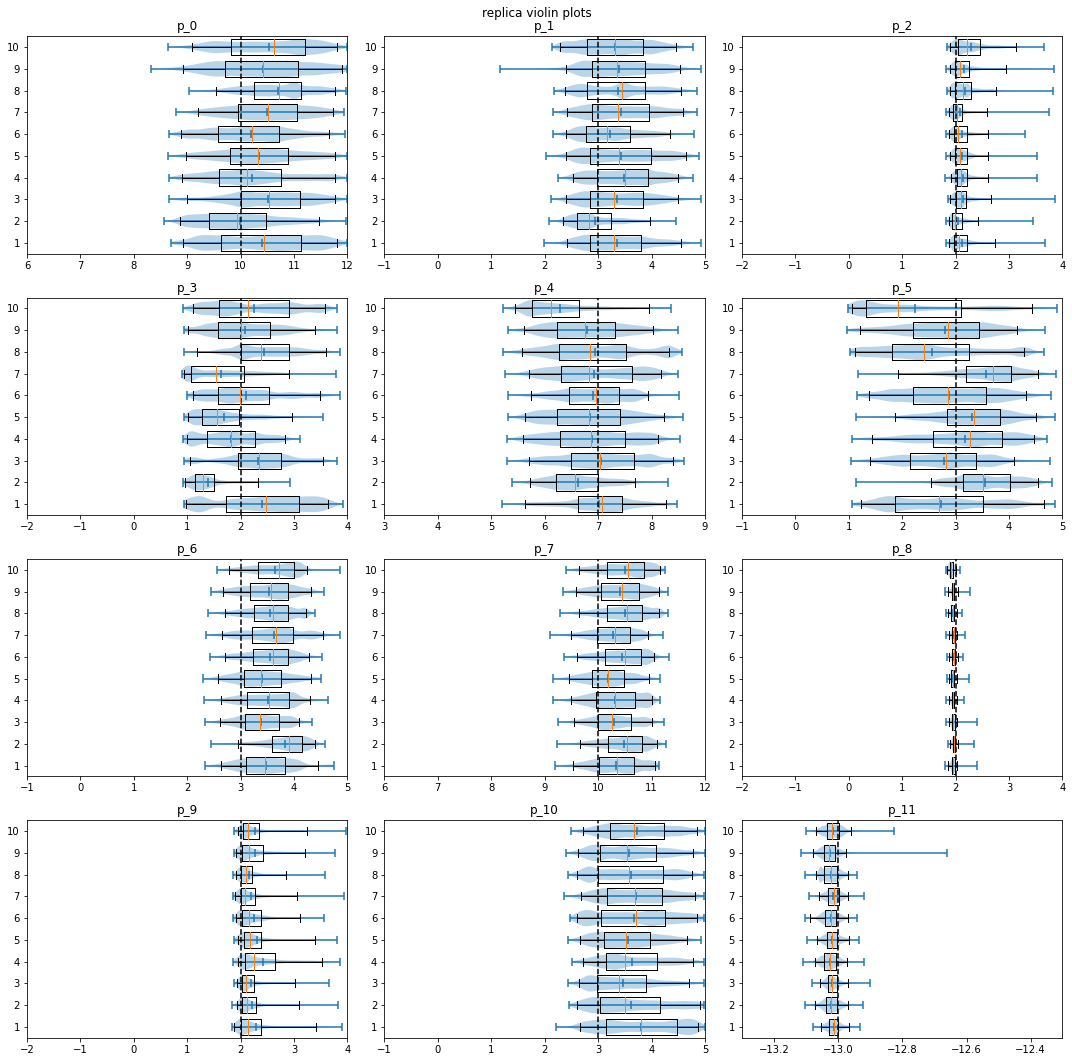

In [35]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pickle, glob, os


# parameter info for model
p_info = [   
        ["log10_k1_f",6,12,10.],
        ["log10_k1_r",-1,5,3.],
        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],
        ["log10_k6_f",-1,5,3.],
        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]


# load sample data files
data_dir = '/Users/georgeau/Desktop/research_data/2022_10_06_12D/'
data_files = glob.glob(os.path.join(data_dir, '**/samples.csv'),recursive=True)
dfs = []
for file in data_files:
    dfs.append(pd.read_csv(file, names=p_labels, skiprows=0))
print(f"using {len(dfs)} dataframes")
df_concat = pd.concat(dfs)    
# plot histograms



n_bins = 100
fig, axs = plt.subplots(4,3, figsize=(15,15))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    n_list = []
    for j, df_tmp in enumerate(dfs):       
        data_tmp = df_tmp.iloc[:,i]
        n,b,p = ax.hist(data_tmp, density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.5, histtype='step')
        n_list.append(n)
    ax.hist(df_concat.iloc[:,i], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=1.0, color='black', histtype='step', label='agg')
    ax.legend()
    ax.set_title(f'p_{i} distribution')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k')
    p_n_list.append(n_list)
    b_n_list.append(b)
plt.suptitle(f"1D parameter distributions")
plt.tight_layout()    

n_bins = 100
fig, axs = plt.subplots(4,3, figsize=(15,15))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    mean_list = []
    stdev_list = []
    data_list = []
    for j, df_tmp in enumerate(dfs):
        data_tmp = df_tmp.iloc[:,i]
        mean_list.append(data_tmp.mean())
        stdev_list.append(data_tmp.std())
        data_list.append(data_tmp)
    ax.violinplot(data_list, vert=False, showmeans=True, showmedians=False, widths=0.75)
    ax.boxplot(data_list, vert=False, widths=0.75, sym='', whis=(2.5, 97.5))
    ax.axvline(p_true[i], 0,1, ls='--', color='k')
    ax.set_title(f'p_{i}')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
plt.suptitle(f"replica violin plots")
plt.tight_layout()    



### 15D model

using 4 dataframes


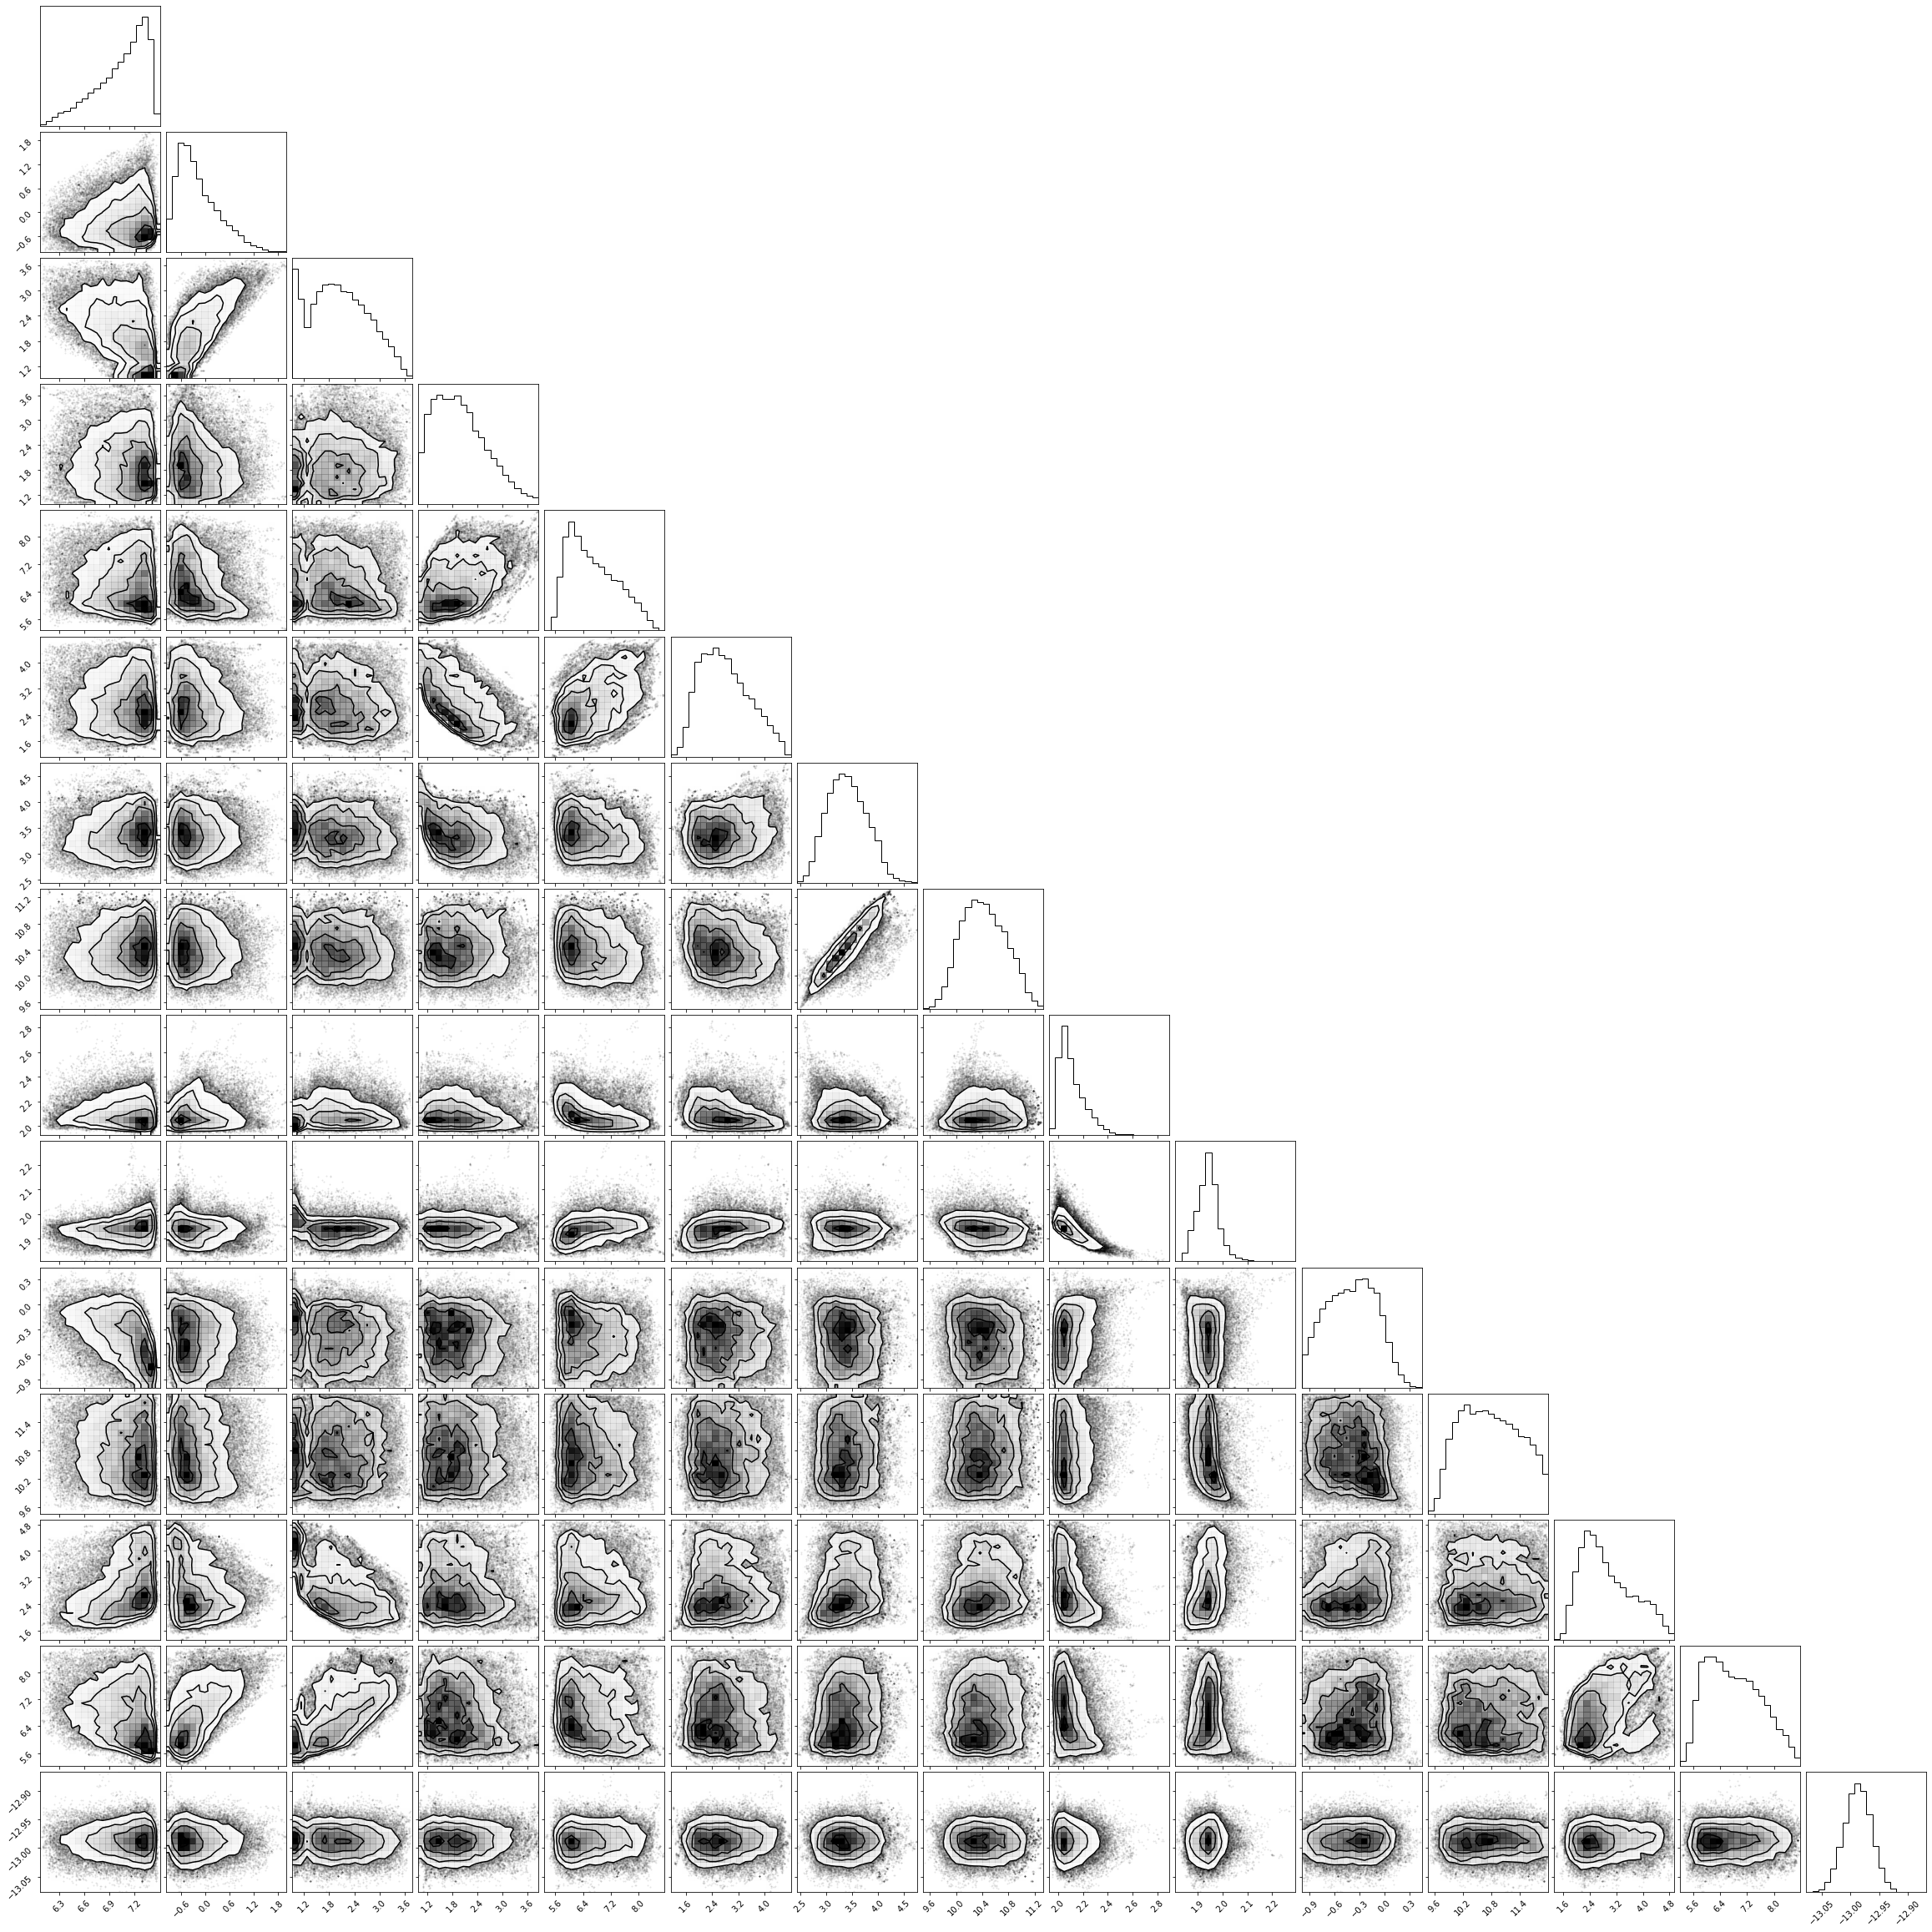

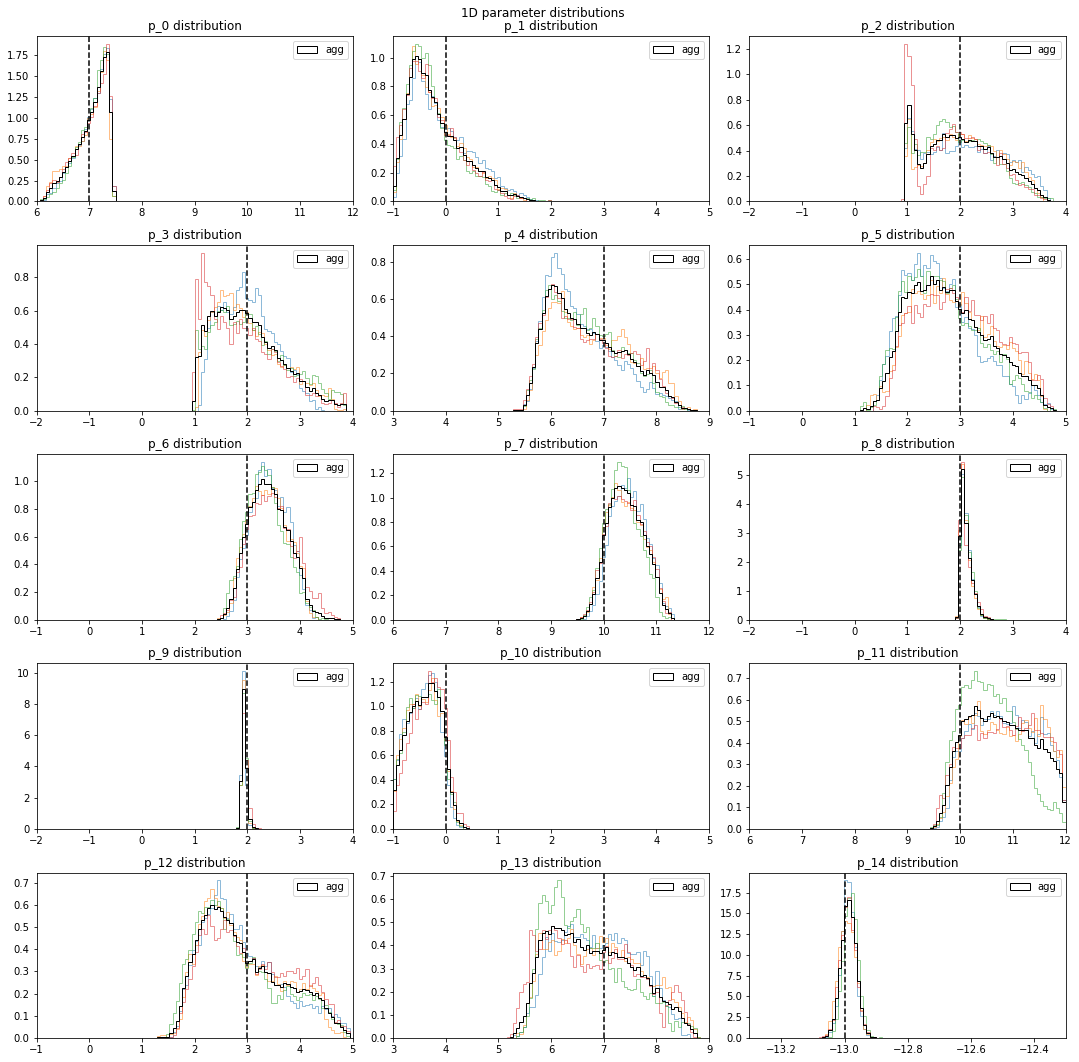

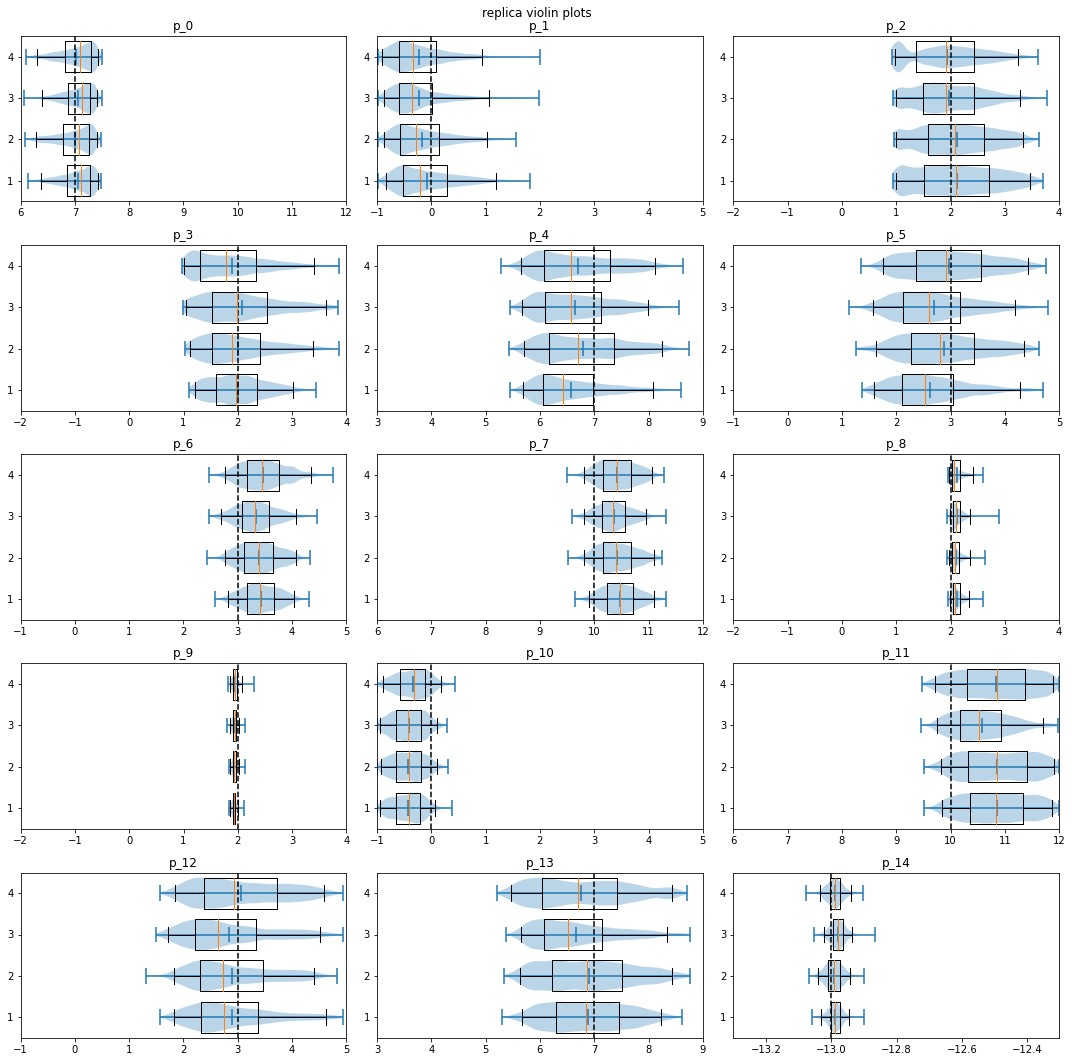

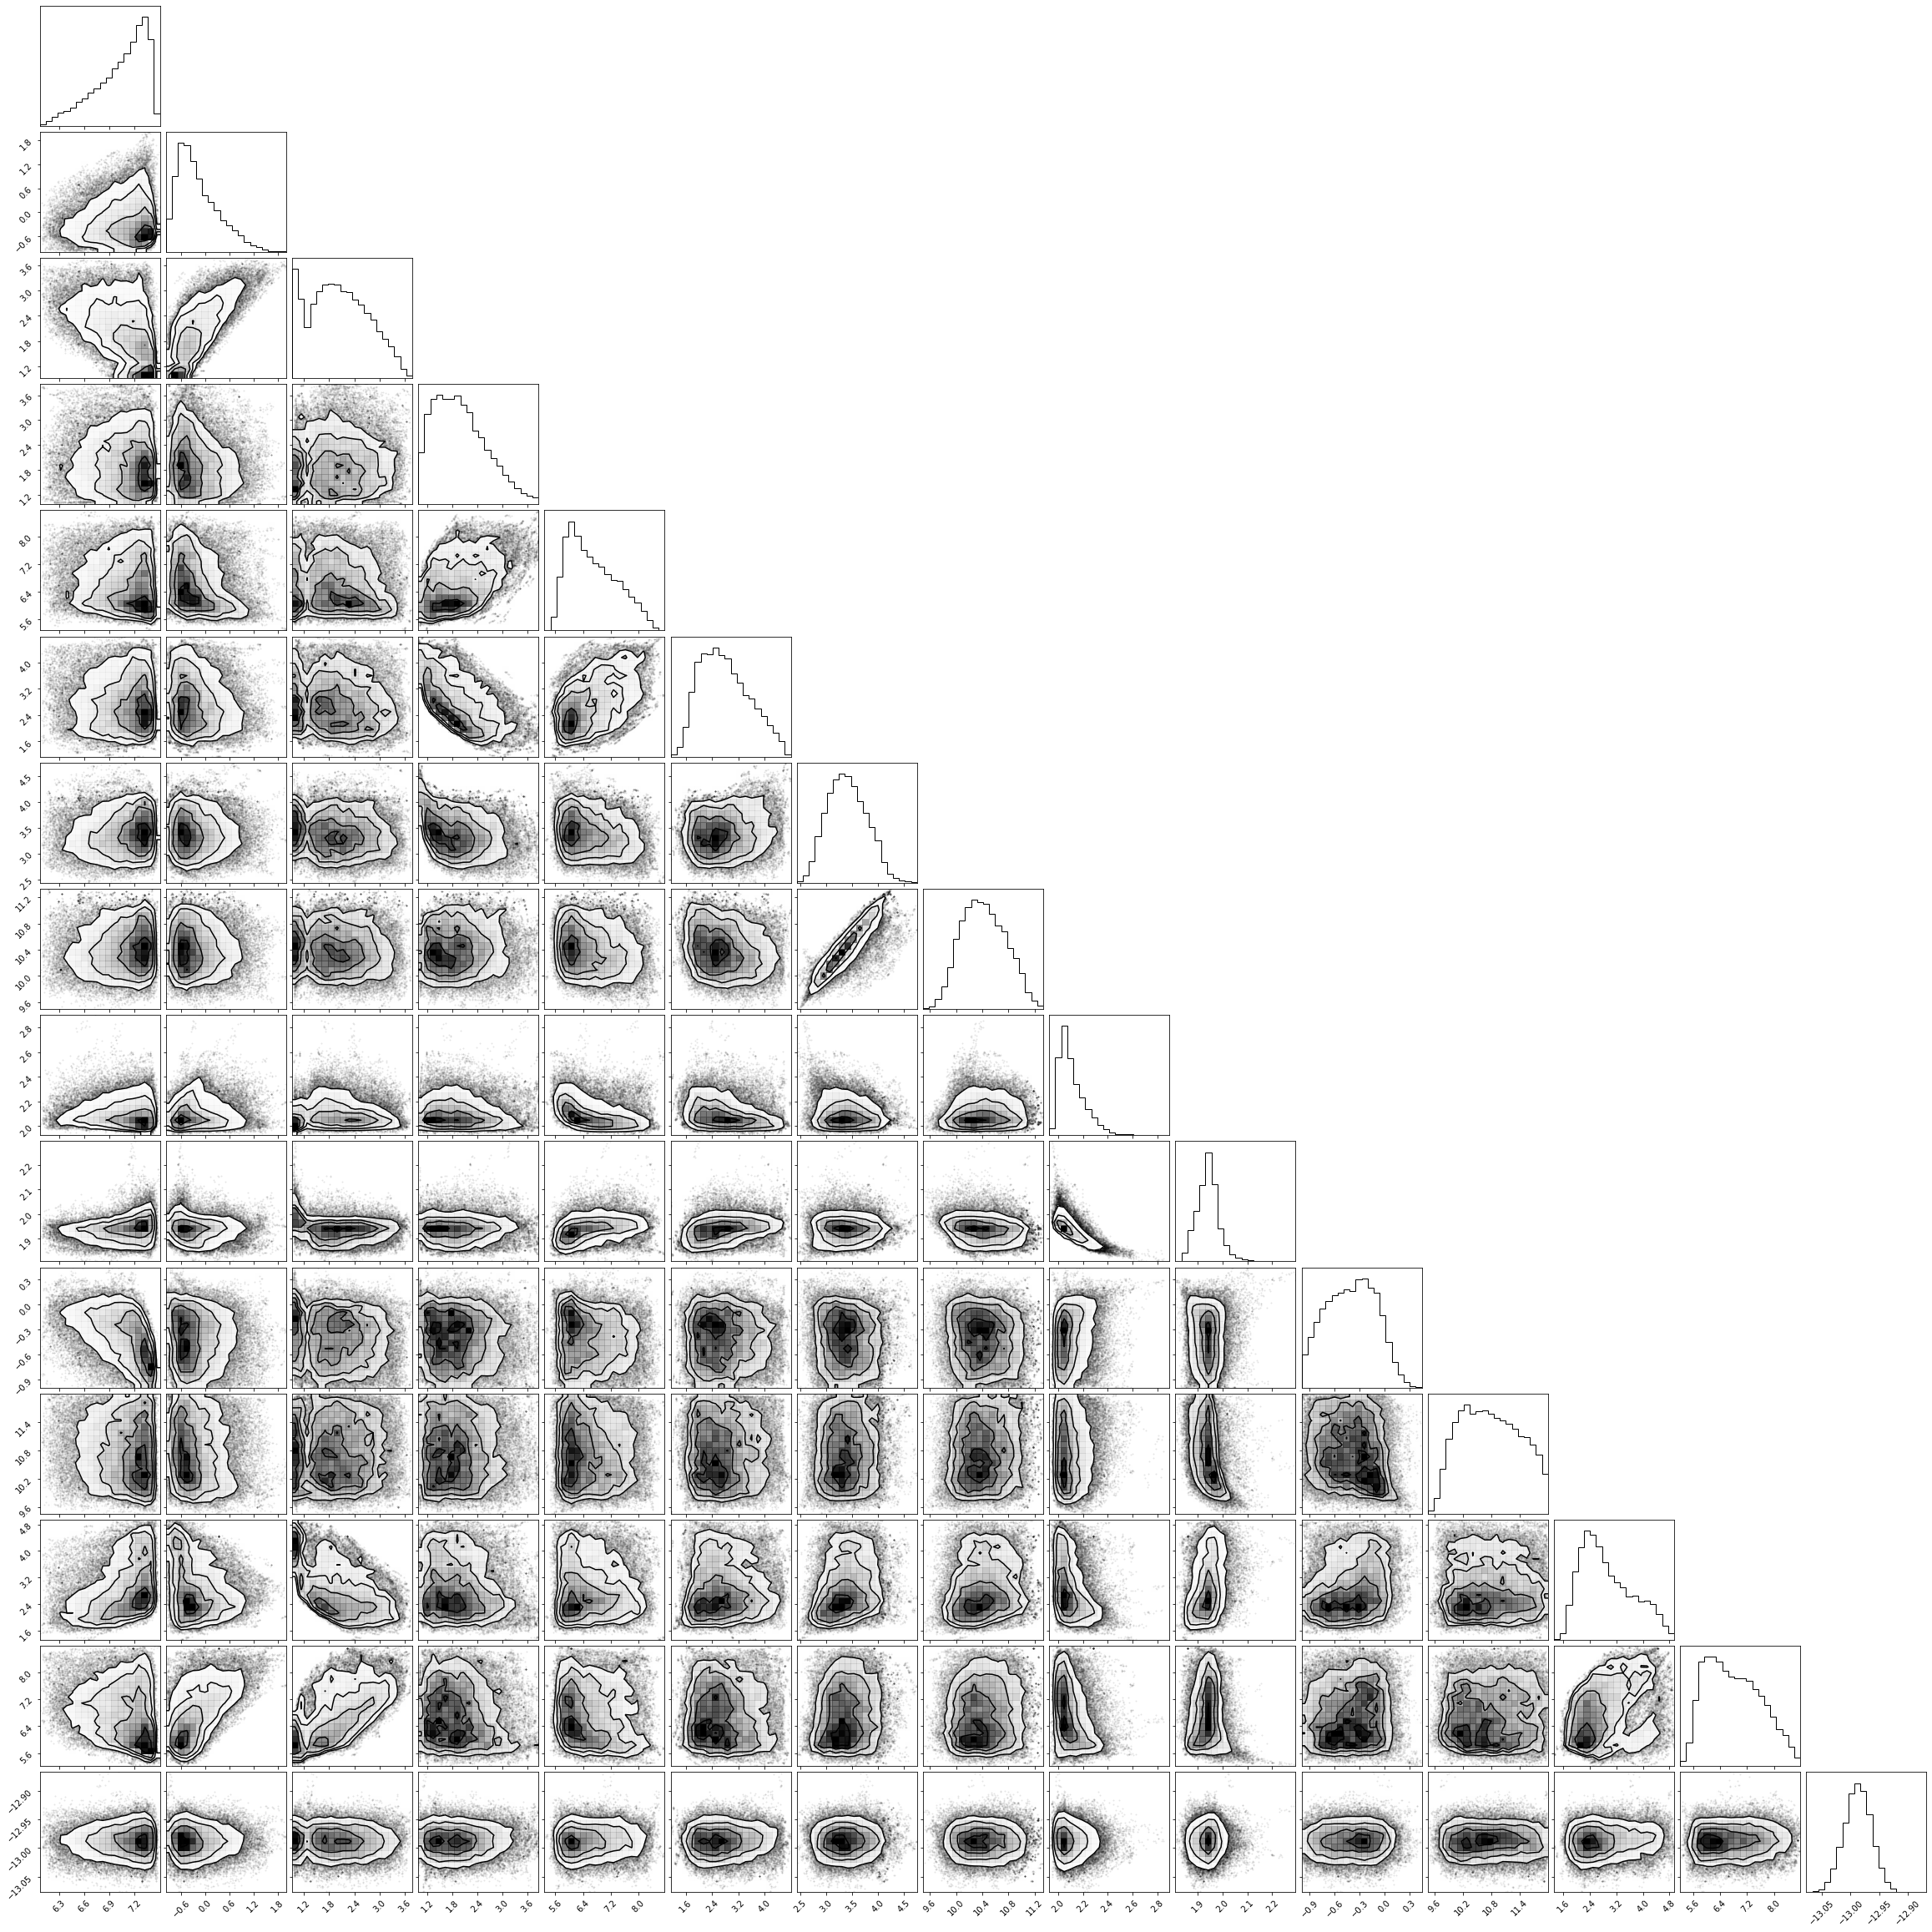

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pickle, glob, os, corner


# parameter info for model
p_info = [   
        ["log10_k1_f",6,12,7.],
        ["log10_k1_r",-1,5,0.],

        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],

        ["log10_k6_f",-1,5,0],

        ["log10_k7_f", 6, 12, 10], 
        ["log10_k8_f", -1, 5, 3], 
        ["log10_k8_r", 3, 9, 7], 

        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]


# load sample data files
data_dir = '/Users/georgeau/Desktop/research_data/2022_10_10/c2'
data_files = glob.glob(os.path.join(data_dir, '**/samples*.csv'),recursive=True)
dfs = []
for file in data_files:
    dfs.append(pd.read_csv(file, names=p_labels, skiprows=0))
print(f"using {len(dfs)} dataframes")
df_concat = pd.concat(dfs)    
# plot histograms

n_bins = 100
fig, axs = plt.subplots(5,3, figsize=(15,15))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    n_list = []
    for j, df_tmp in enumerate(dfs):       
        data_tmp = df_tmp.iloc[:,i]
        n,b,p = ax.hist(data_tmp, density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.5, histtype='step')
        n_list.append(n)
    ax.hist(df_concat.iloc[:,i], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=1.0, color='black', histtype='step', label='agg')
    ax.legend()
    ax.set_title(f'p_{i} distribution')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k')
    p_n_list.append(n_list)
    b_n_list.append(b)
plt.suptitle(f"1D parameter distributions")
plt.tight_layout()    

n_bins = 100
fig, axs = plt.subplots(5,3, figsize=(15,15))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    mean_list = []
    stdev_list = []
    data_list = []
    for j, df_tmp in enumerate(dfs):
        data_tmp = df_tmp.iloc[:,i]
        mean_list.append(data_tmp.mean())
        stdev_list.append(data_tmp.std())
        data_list.append(data_tmp)
    ax.violinplot(data_list, vert=False, showmeans=True, showmedians=False, widths=0.75)
    ax.boxplot(data_list, vert=False, widths=0.75, sym='', whis=(2.5, 97.5))
    ax.axvline(p_true[i], 0,1, ls='--', color='k')
    ax.set_title(f'p_{i}')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
plt.suptitle(f"replica violin plots")
plt.tight_layout()    



figure = corner.corner(df_concat)


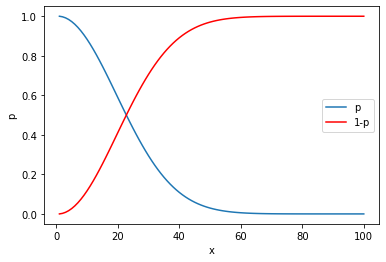

In [20]:
import math
import matplotlib.pyplot

def prob(n):
    y = (math.factorial(365)/math.factorial(365-n))/(365.0**n)
    return y


x = np.arange(1,101,1)
y = np.array([prob(i) for i in x])

plt.plot(x,y, label='p')
plt.plot(x,1-y,'red', label='1-p')
plt.ylabel('p')
plt.xlabel('x')
plt.legend()

Text(0.5, 0, 't')

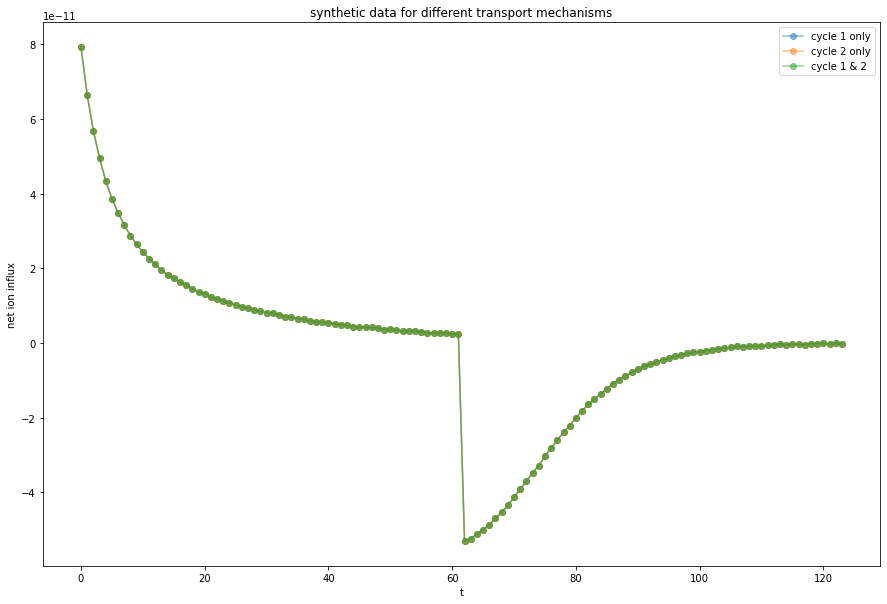

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# f1 = "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/synthetic_data/synth_data_15D_c1_1expA_125s_v3.csv"
# f2 = "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/synthetic_data/synth_data_15D_c2_1expA_125s.csv"
# f3 = "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/synthetic_data/synth_data_15D_c12_1expA_125s.csv"

f1 = "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/synth_data_15D_c1_1expA_125s_v4.csv"
f2 = "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/synth_data_15D_c1_1expA_125s_v4_test.csv"
f3 = "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/synth_data_15D_c1_1expA_125s_v4_test.csv"



y1 = np.genfromtxt(f1)
y2 = np.genfromtxt(f2)
y3 = np.genfromtxt(f3)

plt.figure(figsize=(15,10))
plt.plot(y1,'-o', alpha=0.5, label='cycle 1 only')
plt.plot(y2,'-o', alpha=0.5, label='cycle 2 only')
plt.plot(y3,'-o', alpha=0.5, label='cycle 1 & 2')
plt.legend()
plt.title('synthetic data for different transport mechanisms')

plt.ylabel('net ion influx')
plt.xlabel('t')